# Tools & Techniques: Neural Networks Using Keras

In [1]:
import pandas as pd
import numpy as np

## Read in Housing Data
* Data collected from Realtor.com.
* Houses sold during June 2020 in eastern Loudoun County, VA.
* For our demonstration, the data has already been cleaned.
* Mean Price: ~ $520,000

In [2]:
df = pd.read_csv("tools_techniques.csv")

In [3]:
df

,Beds,SqFt,Built,Garage,FullBaths,HalfBaths,LotSqFt,AboveMeanPrice
0,3,2336,2004,2,2,1,2178,0
1,4,2106,2005,2,2,1,2178,0
2,3,1410,1999,1,2,0,3049,0
3,3,1769,1994,1,2,1,1742,0
4,4,2283,1999,2,3,1,2614,0
...,...,...,...,...,...,...,...,...
542,4,2780,1967,2,3,1,47480,1
543,4,3430,2013,0,4,1,43560,1
544,3,1346,1977,0,2,0,15682,0
545,5,3696,2002,2,3,1,11326,1


In [4]:
dataset = df.values

In [5]:
dataset

array([[    3,  2336,  2004, ...,     1,  2178,     0],
       [    4,  2106,  2005, ...,     1,  2178,     0],
       [    3,  1410,  1999, ...,     0,  3049,     0],
       ...,
       [    3,  1346,  1977, ...,     0, 15682,     0],
       [    5,  3696,  2002, ...,     1, 11326,     1],
       [    4,  2491,  1974, ...,     0, 10019,     1]])

In [6]:
X = dataset[:, 0:7]

In [7]:
Y = dataset[:,7]

## Normalize Data

In [8]:
from sklearn import preprocessing

In [9]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_scale

array([[0.4       , 0.16361181, 0.86885246, ..., 0.2       , 1.        ,
        0.00172891],
       [0.6       , 0.14142389, 0.87704918, ..., 0.2       , 1.        ,
        0.00172891],
       [0.4       , 0.0742813 , 0.82786885, ..., 0.2       , 0.        ,
        0.00242031],
       ...,
       [0.4       , 0.06810727, 0.64754098, ..., 0.2       , 0.        ,
        0.01244845],
       [0.8       , 0.29480996, 0.85245902, ..., 0.4       , 1.        ,
        0.00899064],
       [0.6       , 0.17856454, 0.62295082, ..., 0.4       , 0.        ,
        0.00795313]])

## Partition Data

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(382, 7) (82, 7) (83, 7) (382,) (82,) (83,)


## Model Building

In [12]:
from keras.models import Sequential
from keras.layers import Dense

In [13]:
model = Sequential([
    Dense(16, activation='relu', input_shape=(7,)), #hidden layer  ***
    Dense(1, activation='sigmoid')]) #output layer (1 neuron)

In [14]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [15]:
hist = model.fit(X_train, Y_train,
          batch_size=16, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
24/24 [==============================] - 0s 13ms/step - loss: 0.7133 - accuracy: 0.3691 - val_loss: 0.6971 - val_accuracy: 0.5244
Epoch 2/100
24/24 [==============================] - 0s 6ms/step - loss: 0.7079 - accuracy: 0.4005 - val_loss: 0.6923 - val_accuracy: 0.5366
Epoch 3/100
24/24 [==============================] - ETA: 0s - loss: 0.7044 - accuracy: 0.43 - 0s 19ms/step - loss: 0.7030 - accuracy: 0.4188 - val_loss: 0.6880 - val_accuracy: 0.5488
Epoch 4/100
24/24 [==============================] - 0s 7ms/step - loss: 0.6982 - accuracy: 0.4634 - val_loss: 0.6840 - val_accuracy: 0.5976
Epoch 5/100
24/24 [==============================] - 0s 9ms/step - loss: 0.6939 - accuracy: 0.4869 - val_loss: 0.6802 - val_accuracy: 0.5976
Epoch 6/100
24/24 [==============================] - 0s 16ms/step - loss: 0.6898 - accuracy: 0.5026 - val_loss: 0.6765 - val_accuracy: 0.5854
Epoch 7/100
24/24 [==============================] - 0s 12ms/step - loss: 0.6860 - accuracy: 0.5340 - val_los

You have a strong model if your test accuracy is between 80% and 95%. 
* Above 95%, you likely overfit the model.
* Below 80%, the model didn't capture enough of the data's variability.

In [16]:
model.evaluate(X_test, Y_test)[1] #0 = loss, 1 = accuracy

3/3 [==============================] - 0s 3ms/step - loss: 0.3672 - accuracy: 0.8072


0.8072289228439331

In [17]:
import matplotlib.pyplot as plt

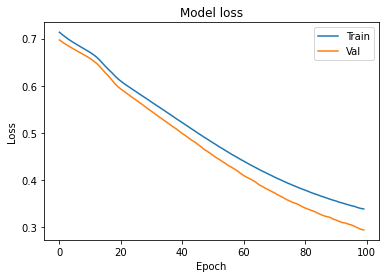

In [18]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

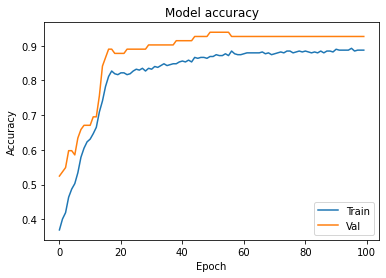

In [19]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

## Making Predictions
Predict whether a house with the following characteristics is above or below the average price.
* Bedrooms: 4
* Square Feet: 2,500
* Year Built: 2001
* Garage Spaces: 2
* Full Bathrooms: 3
* Half Bathrooms: 1
* Lot Size: 3,452 Square Feet

In [20]:
x = [[4, 2500, 2001, 2, 3, 1, 3452]] 
print(model.predict(x)[0])

[1.]


# Summary

* Keras is an easy to use, well-known library for constructing neural networks in Python.
* It was designed with a user-friendly API with easy to decipher error messages.
* Neural Networks emulate human pattern-recognition skills to analyze large datasets (particularly nonlinear responses).